# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

# Overview
##### Here we begin by loading the dataset and performing basic cleaning. We ensure that all the variables are correctly formatted. We aggregate the data by year to create structured time series.

In [3]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head(4)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

#describe tge data 
print(f"Description of data containing numerical values: {df.describe}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64
Description of data containing numerical values: <bound method NDFrame.describe of          Year  Global Average Temperature (°C)  CO2 Concentration

In [5]:
# TODO: Aggregate data by year to create a 124-year time 
ag_data = df.groupby('Year').mean().reset_index()
print(ag_data.head())

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.138338                       9.056501  
4           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

## Objective
##### In this section, we analyze each climate variables individually. We perform descriptive statistics like Mean, Median, Standard Deviation, Min, and Max. Additionally, we use visualization tools like histograms, boxplots, lineplot, and kdeplot to identify trends and outliers. 

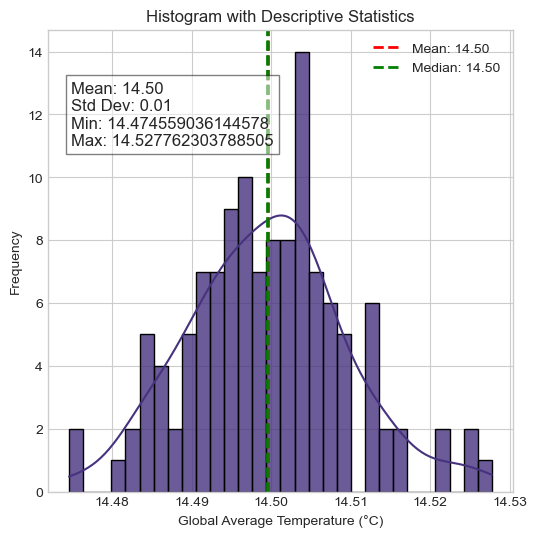

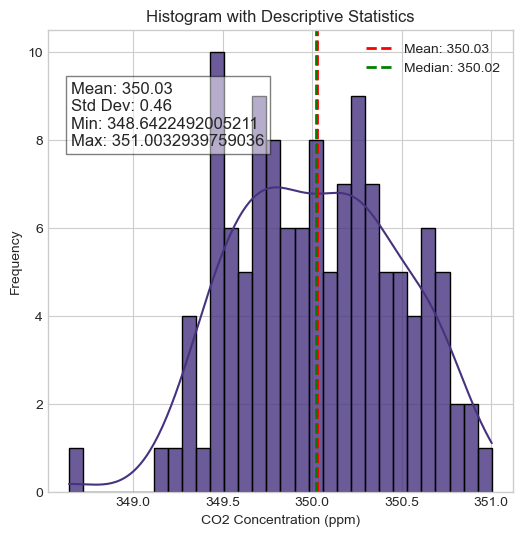

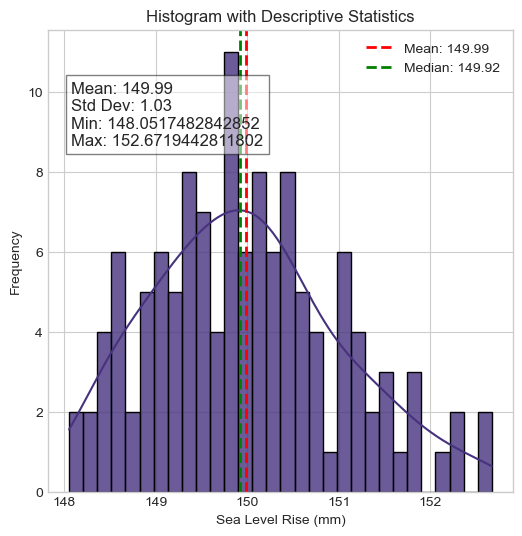

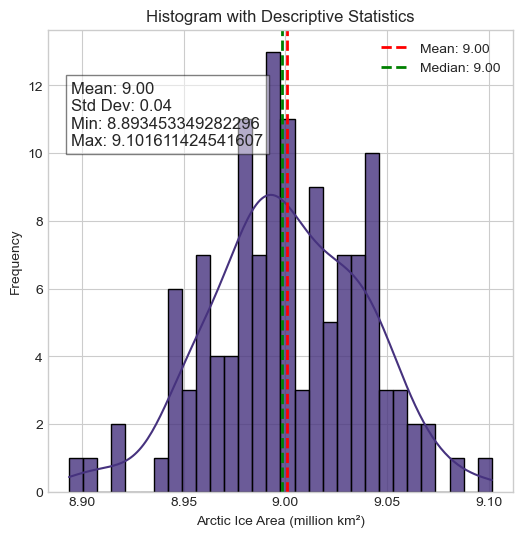

In [6]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# histplot for df.columns
for var in df.columns:
 if var != "Year":
  descriptive_stats = ag_data[var].describe()
  plt.figure(figsize = (6,6))
  sns.histplot(data = ag_data, x = var, kde= True, bins = 30, alpha = 0.8)
  plt.axvline(descriptive_stats["mean"], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {descriptive_stats['mean']:.2f}")
  plt.axvline(descriptive_stats["50%"], color='green', linestyle='dashed', linewidth=2, label=f"Median: {descriptive_stats['50%']:.2f}")
  
  stats_text = (f"Mean: {descriptive_stats['mean']:.2f}\n"
  # Display text box with statistics
                f"Std Dev: {descriptive_stats['std']:.2f}\n"
                f"Min: {descriptive_stats['min']}\n"
                f"Max: {descriptive_stats['max']}")
  plt.text(0.05, 0.75, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
  
  plt.legend()
  plt.title("Histogram with Descriptive Statistics")
  plt.xlabel(var)
  plt.ylabel("Frequency")
  plt.show()


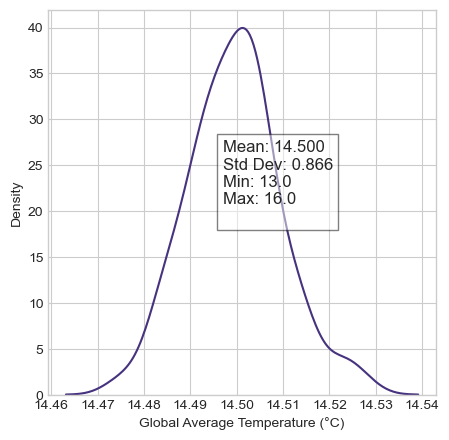

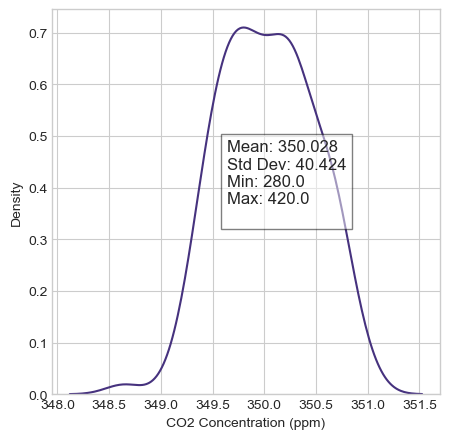

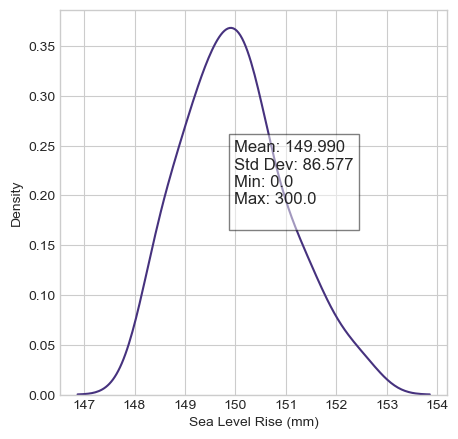

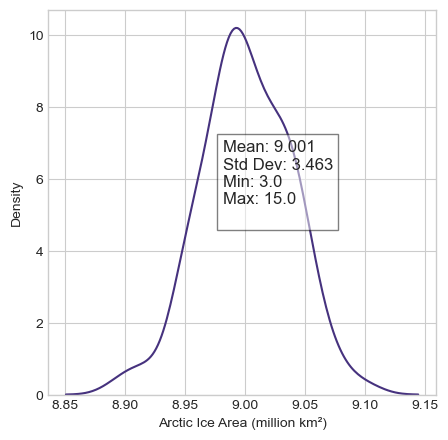

In [7]:
#kdeplot for next column CO2 Concentration (ppm)
for var in df.columns:
 if var != "Year":
  discribe = df[var].describe()
  
  plt.figure(figsize=(5,5))
  sns.kdeplot(data= ag_data, x = var )
  discriptivetext = (f"Mean: {discribe['mean']:.3f}\n"
                     f"Std Dev: {discribe['std']:.3f}\n"
                     f"Min: {discribe['min']}\n"
                     f"Max: {discribe['max']}\n")
  plt.text(0.45, 0.45, discriptivetext, transform = plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
  plt.show()

## Insight from histplots with kde and kde plots
<ul> <li> Global average temperature </li>
The diagrams suggests the average global temperature has nearly a symmetric distribution with the temperature slightly increasing overs time. 

<li> CO<sub>2</sub> Concentration (ppm)</li>
The data about the concentration of CO2 in the environment shows that the distribution is slightly right skewed with most of the data lying beyond the second quartile. 

<li> Sea level rise (mm)</li>
The histogram and kde plots showing data about the rise in sea level is right skewed with most of the data lying around the mean and median. The mean is negligibly greater than the median.

<li> Arctic Ice Area (million km²)</li>
The histplot and kdeplot shows that the Arcitic ice area is relatively stable with most of the data concentrated towards the mean and median. It is almost a normal distribution.
</ul>

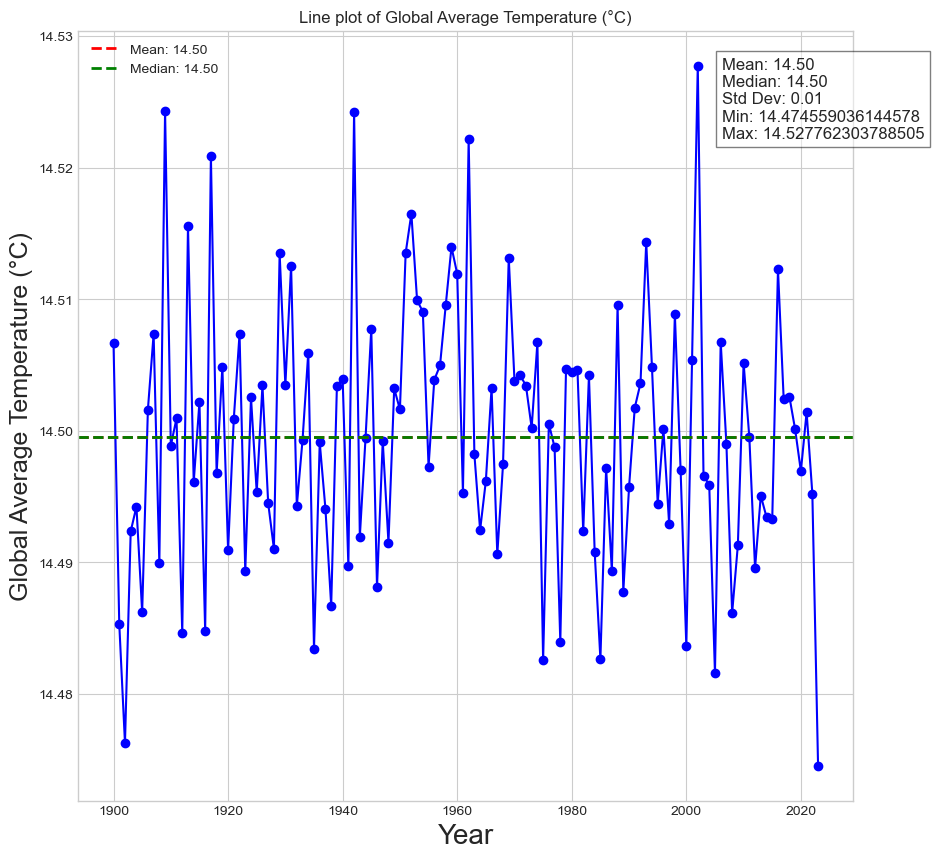

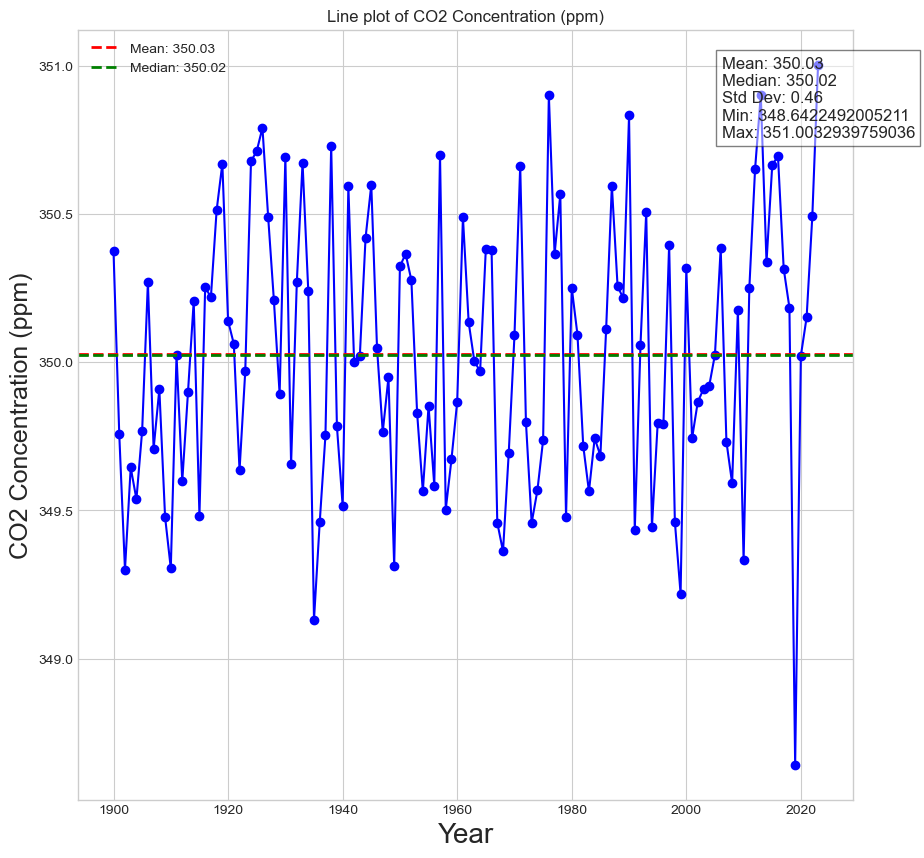

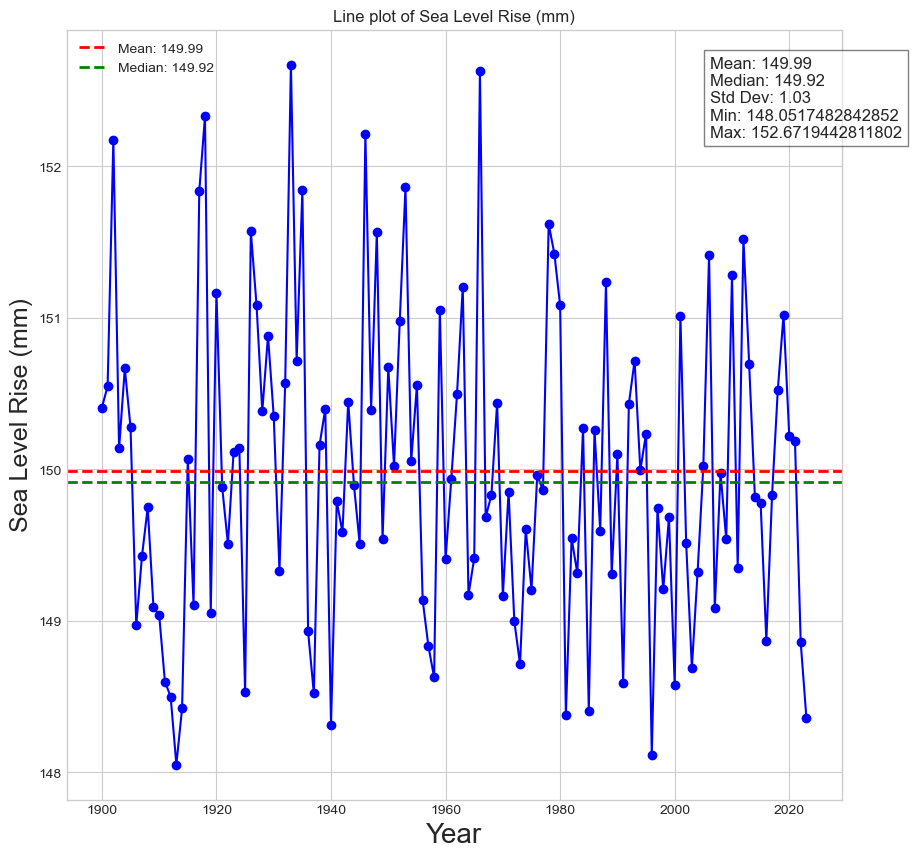

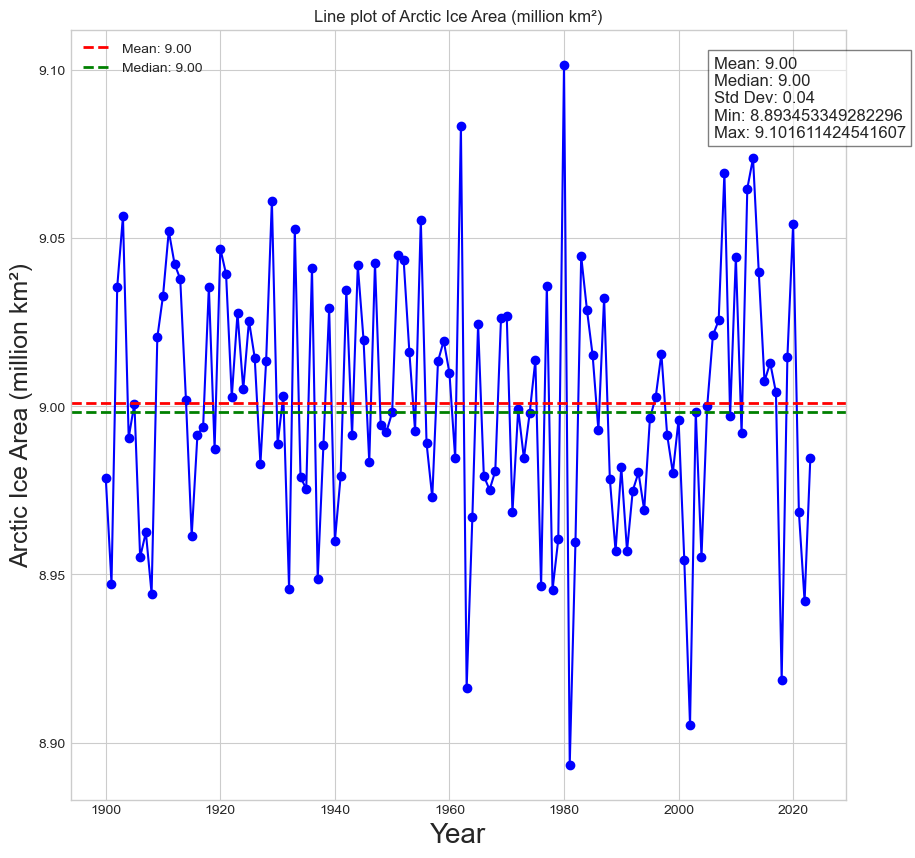

In [8]:
#descriptive statistics of aggregate datas in lineplot
for var in df.columns:
 if var != "Year":
   desc_stats = ag_data[var].describe()

#Extract keys
   mean_value = desc_stats["mean"]
   median_value = desc_stats["50%"]
   min_value = desc_stats["min"]
   max_value = desc_stats["max"]
   std_dev = desc_stats["std"]
   
   plt.figure(figsize= (10,10))
   plt.title(f'Line plot of {var}')
   plt.xlabel('Year', fontsize = 20)
   plt.ylabel(var, fontsize = 18)
   plt.plot(ag_data["Year"], ag_data[var], marker = 'o', color = 'b')
   plt.axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
   plt.axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")
   
   # Display descriptive stats on the plot
   stats_text = (f"Mean: {mean_value:.2f}\n"
                 f"Median: {median_value:.2f}\n"
                 f"Std Dev: {std_dev:.2f}\n"
                 f"Min: {min_value}\n"
                 f"Max: {max_value}")
   plt.text(0.83, 0.86, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
   
   plt.legend()
   plt.grid(True)
   plt.show()


## Insight from Lineplot analysis of climate variables

<ul><li>Average Global Temperature (℃)</li>
The line plot shows the inconsistent pattern of the global average temperature. With most of the data concentrated around the mean, the highest temperature was around the year 2000, which was a surge from the nearly low temperature 14.484℃.

<li>CO2 Concentration (ppm)</li>
The line plot shows the CO₂ concentration globally was nearly consistent till 2020, when it reached 351 ppm. 

<li>Sea Level Rise</li>
The average sea level has been observed to decline continuously since 1965. Most of the data lies below the mean sea level at the given point of time.

<li>Arctic Area (million km²)</li>
From the line plot of Arctic Ice Area (in million km²) versus year, it can be observed that the area has been extremely fluctuating at a regular interval of around 20 years while it remains within 1 standard deviations from the mean throughout the period.</ul>

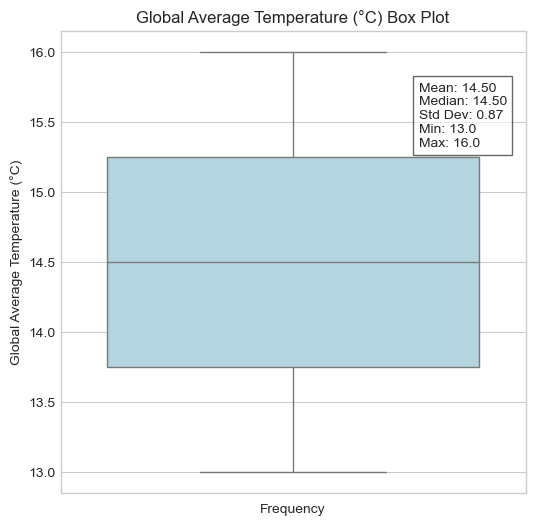

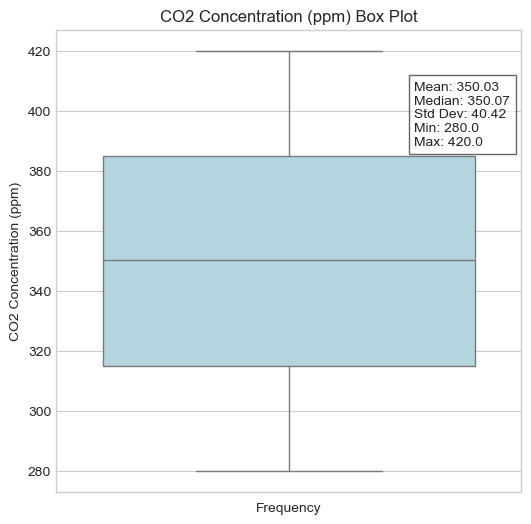

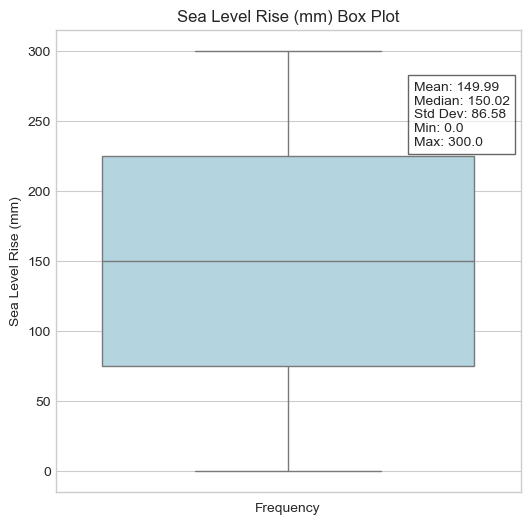

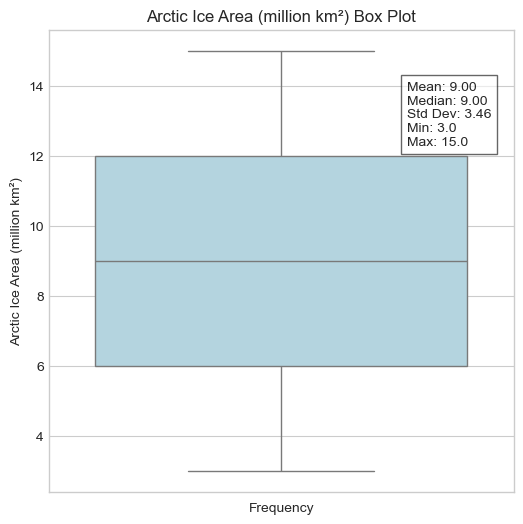

In [24]:
# Univariate analysis with boxplot
for var in df.columns:
 if var != "Year":
   disc = df[var].describe()

   #Extract keys
   mean_value1 = disc["mean"]
   median_value1 = disc["50%"]
   min_value1 = disc["min"]
   max_value1 = disc["max"]
   std_dev1 = disc["std"]
   
   plt.figure(figsize=(6,6))
   sns.boxplot(df[var], color= "lightblue", orient= 'v')
   plt.title(f"{var} Box Plot")
   plt.xlabel("Frequency")
   plt.ylabel(var)
   
   stats_text = (f"Mean: {mean_value1:.2f}\n"
                 f"Median: {median_value1:.2f}\n"
                 f"Std Dev: {std_dev1:.2f}\n"
                 f"Min: {min_value1}\n"
                 f"Max: {max_value1}")
   plt.text(0.77, 0.75, stats_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
  
   plt.show()

# Insight from boxplot

<ul><li>Average Global Temperature (℃</li>
The interquartile range is 1.5℃, which is comparatively small. Hence, most of the data concentrates around the median. The Range is of 3.

<li>CO2 Concentration (ppm</li>
There are no outliers in the figure. The interquartile range is about 60 with the median at 350.07ppm. 

<li>Sea Level Rise</li>
The larger whisker length suggests that the min and max values are scattered largely from the central values. The interquartile range is about 150mm.

<li>Arctic Area (million km²)</li>
This data is a normal distribution because the data are equally distributed across the mean and median, both being the same. The interquartile range is 6 (million km²).  </ul>

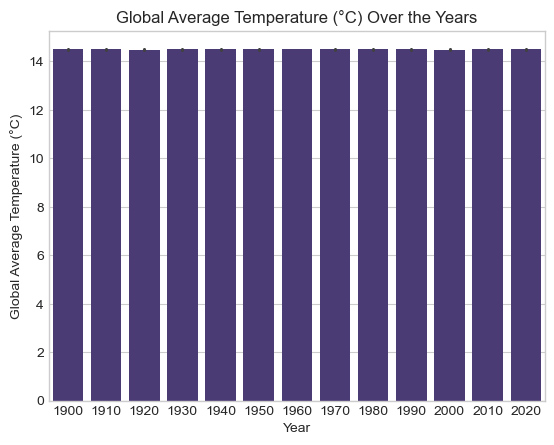

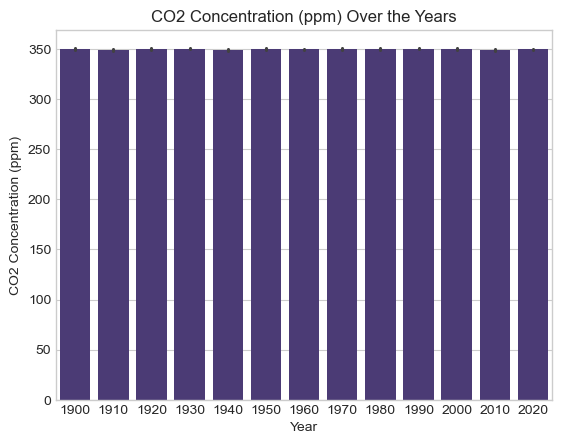

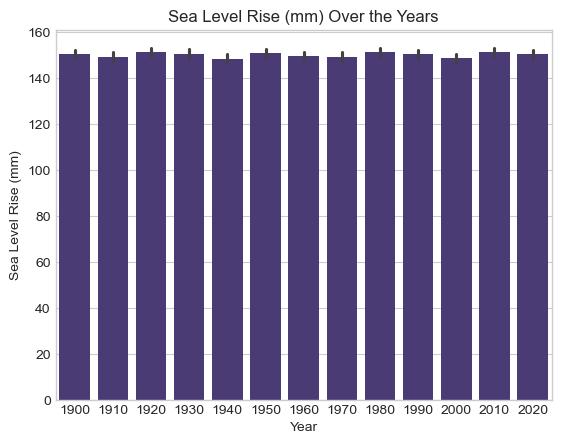

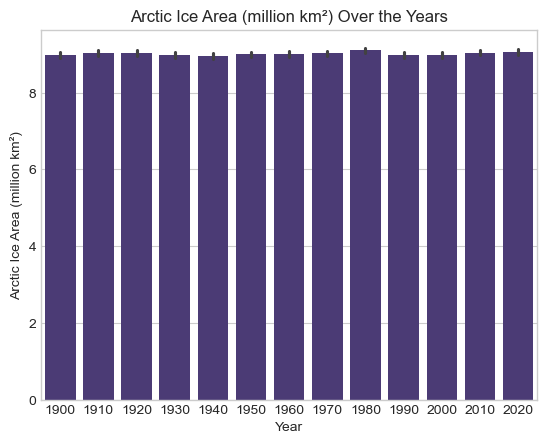

In [33]:
filter_data= df[df["Year"] % 10 == 0]
for var in df.columns:
    if var != 'Year':
        plt.Figure(figsize=(6,6))
        sns.barplot(data= filter_data,x=filter_data["Year"],y= filter_data[var])
        plt.title(f'{var} Over the Years')
        plt.show()
            

# Insight from barplots
<ul>
<li>Average Global Temperature (℃)</li>
Although the growth is unnoticeable, the global temperature trend is increasing negligibly over the years in the long run. 
<br>
<li>CO2 Concentration (ppm)</li>
Despite global efforts to reduce CO2 concentration, the data shows a consistency in the amount of CO2. <br>
<li>Sea Level Rise</li>
The boxplot shows that the sea level is rising consistently over the years with some fluctuations in the rate of growth.<br>
<li>Arctic Area (million km²)</li>
The plot shows that the Arctic Ice area is continuously declining due to various climate factors.<br>
</ul>

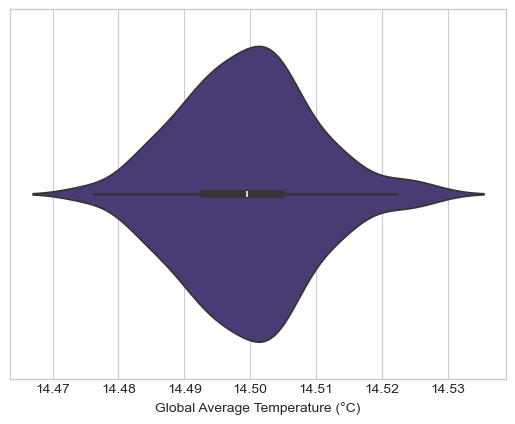

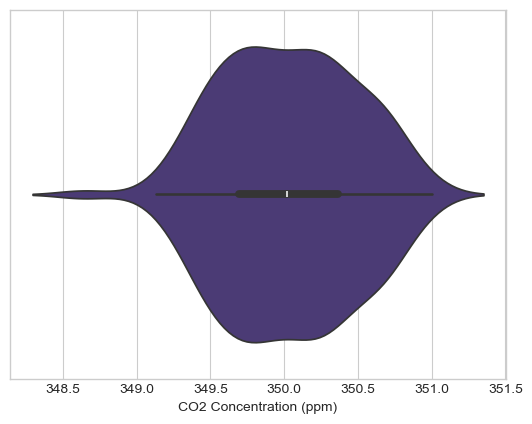

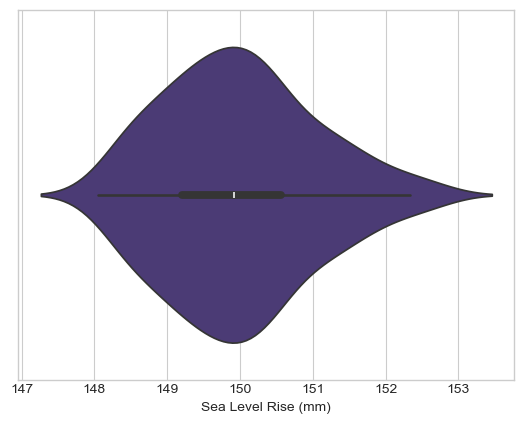

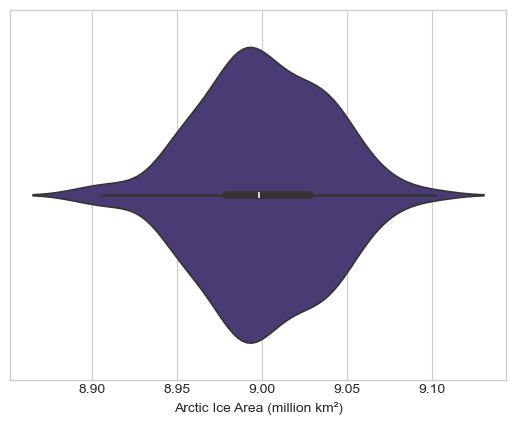

In [26]:
for var in df.columns:
    if var != 'Year':
        plt.Figure(figsize= (4,4))
        sns.violinplot(data=ag_data,x = ag_data[var])
        plt.show()

# Insight from violin plot
<ul>
<li>Average Global Temperature (℃)</li>
The plot confirms that most of the data are concentrated near the median. Similarly,frequency decreases with the higher and lower the values are.
<li>CO2 Concentration (ppm)</li>
The Violin plot suggests that the data around the central tendency are repeated more often. The year count of lower CO2 concentration is comparatively less than that of higher CO2 level.

<li>Sea Level Rise</li>
Though the sea level is continuously rising, the evidence of higher growth is found comparatively less. Most of the data are concentrated around the median with an average sea level rise of 149.99mm.

<li>Arctic Area (million km²)</li>
The number of years with arctic ice area greater than 9.06 and less than 8.93 is rarely found. Most of the data are concentrated around the median value. 
</ul>

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

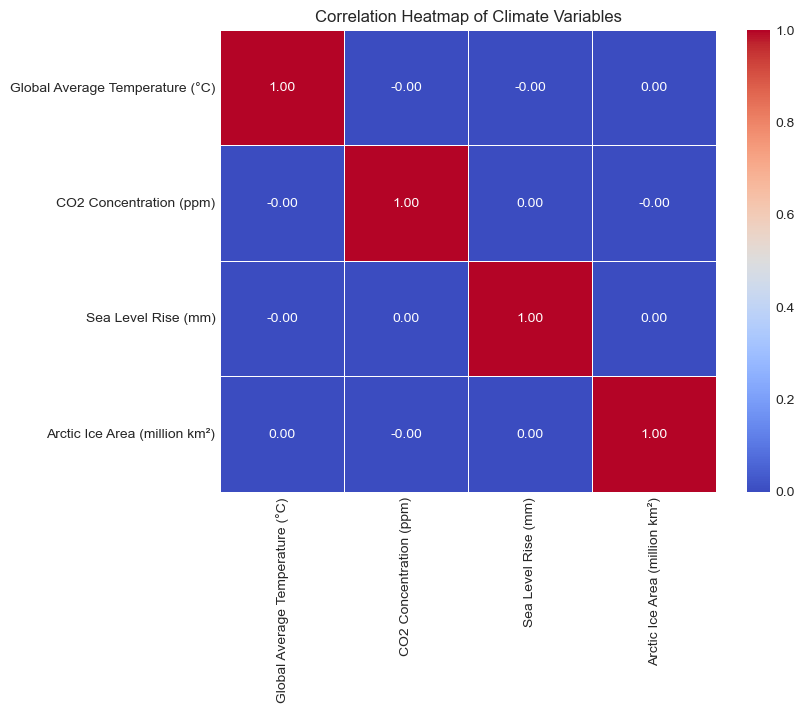

In [27]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
variables = ['Global Average Temperature (°C)',	'CO2 Concentration (ppm)',	'Sea Level Rise (mm)',	'Arctic Ice Area (million km²)']
correlation_matrix = df[variables].corr()
# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Variables")
plt.show()

## Correlation Heatmap Analysis
### Insights from the Correlation Matrix
<ul><li>
The heatmap shows weak correlations among climate variables.
</li>
<li>
While CO2 and temperature have some relationship (-0.068), it is weaker than expected,
likely due to other influencing climate factors.
</li>
<li>
The highest correlation is between Sea Level Rise and Arctic Ice Area (0.13),
which aligns with the idea that melting ice contributes to rising sea levels.
</li>

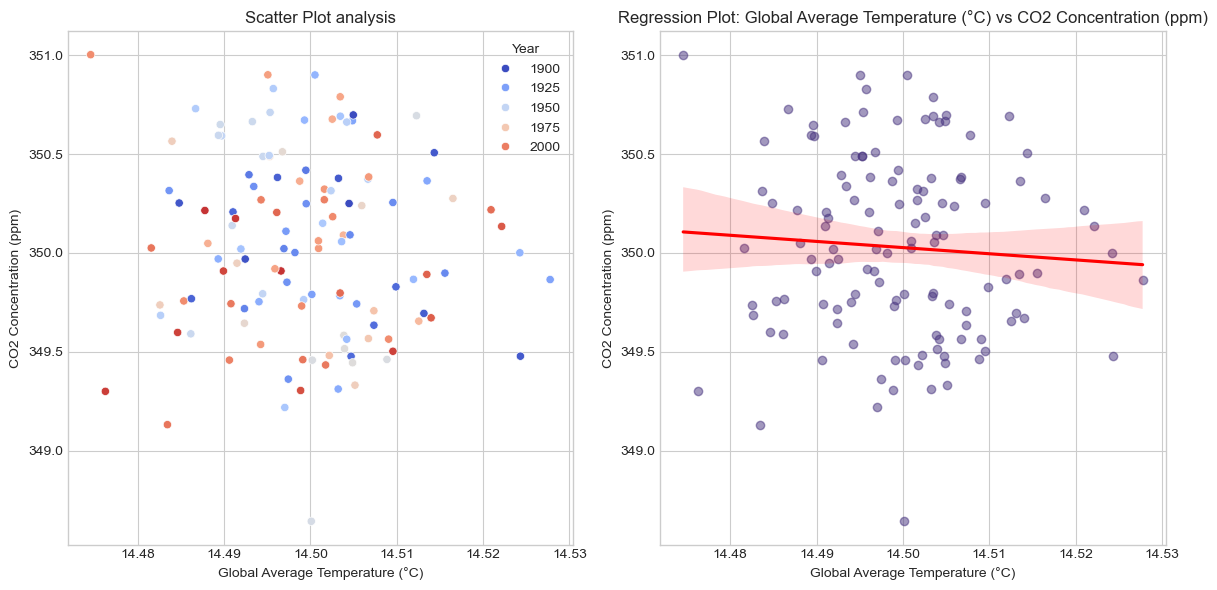

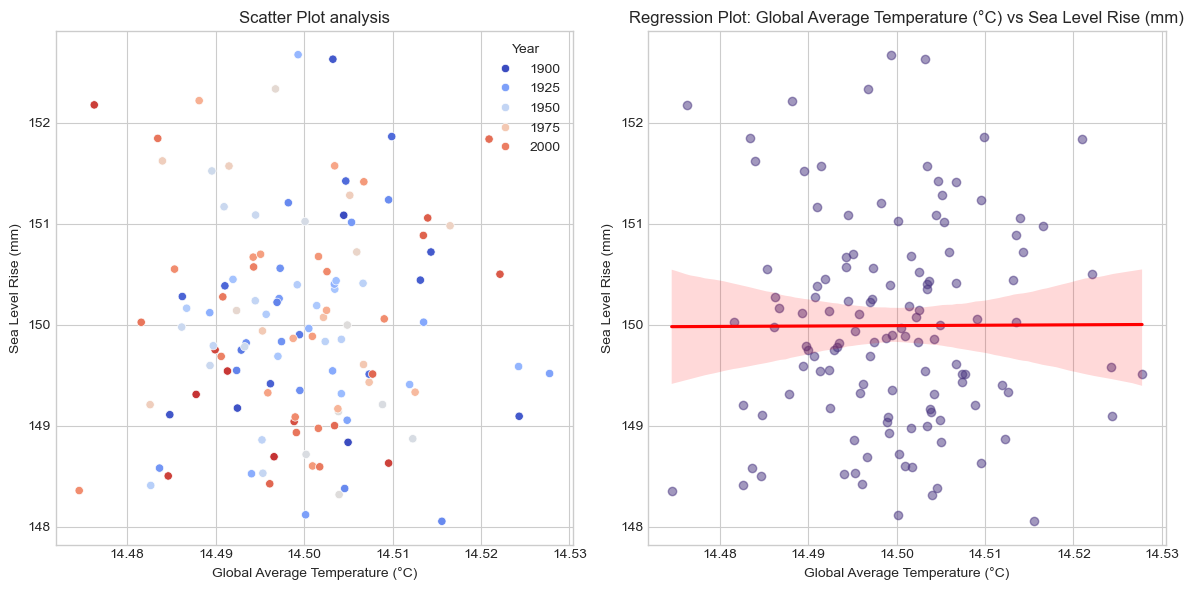

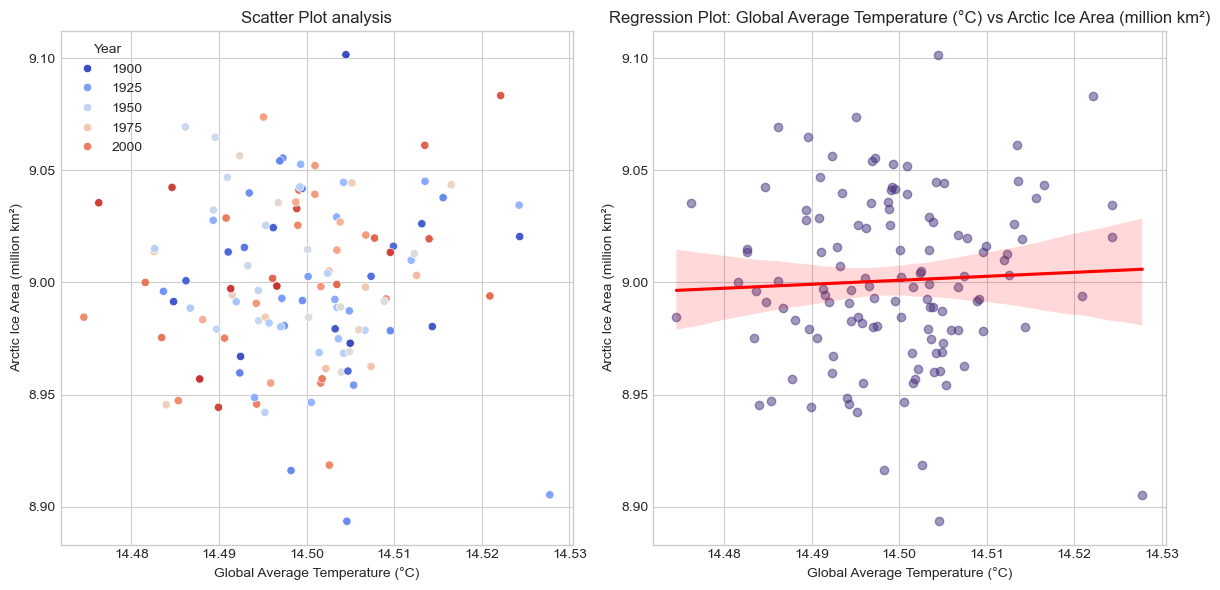

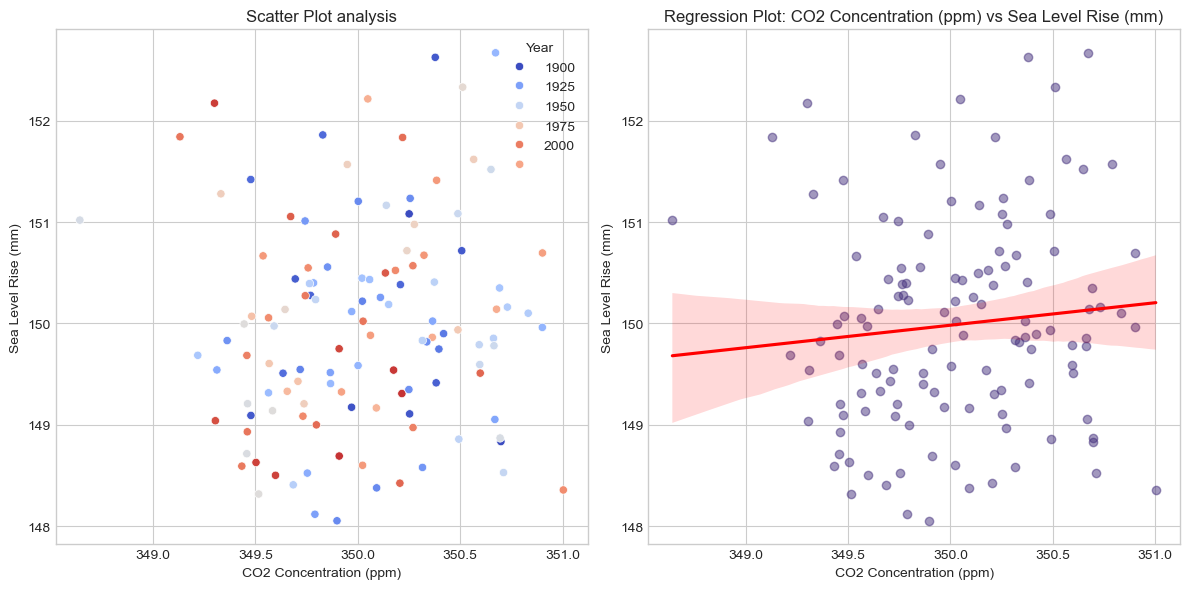

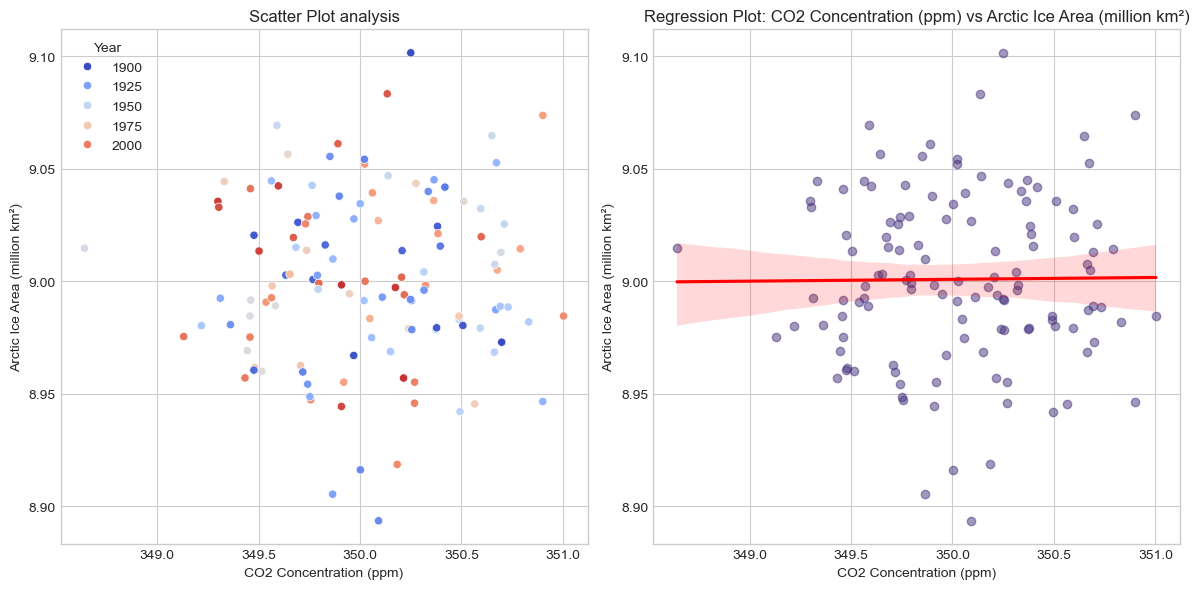

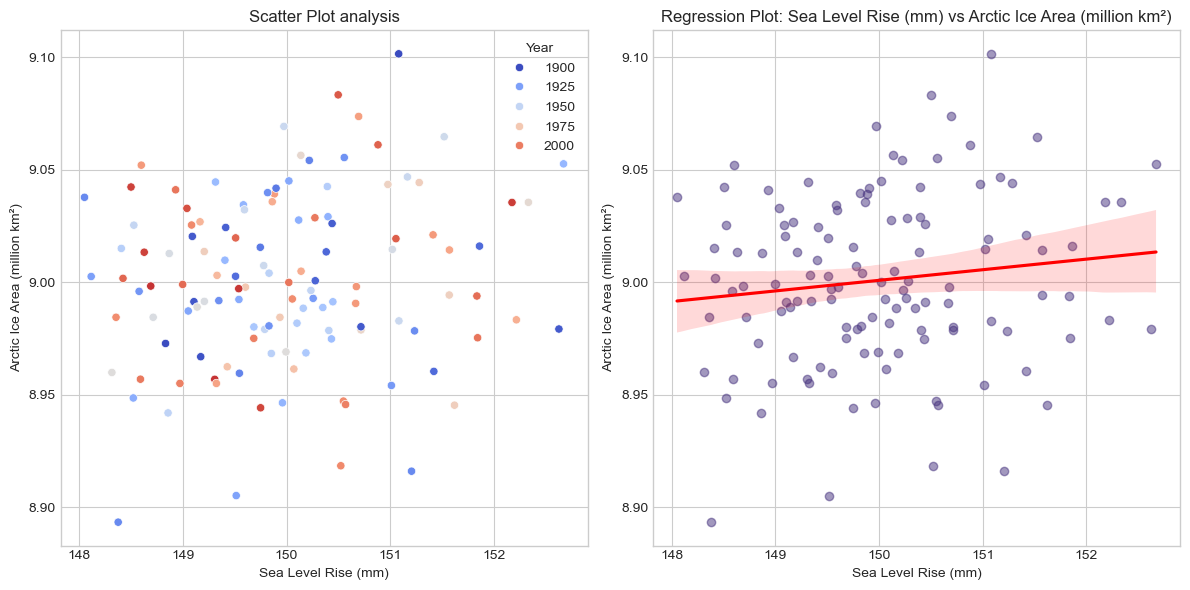

In [34]:
#function to create scatterplot
def bivariate_scatterplot(ax, ag_data, xvar, yvar):
    sns.scatterplot(x=ag_data[xvar] , y=ag_data[yvar],hue = df['Year'], palette="coolwarm", ax=ax)
    ax.set_title("Scatter Plot analysis")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)
    

# Function to create a regression plot
def bivariate_regplot(ax, ag_data, xvar, yvar):
    sns.regplot(x=ag_data[xvar], y=ag_data[yvar], scatter_kws={"alpha":0.5}, line_kws={"color":"red"}, ax=ax)
    ax.set_title(f"Regression Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)

# Function that creates a subplot including both scatter plot and regplot
def bivariate_subplot_analysis(ag_data, xvar, yvar):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
    bivariate_scatterplot(axes[0], ag_data, xvar, yvar)
    bivariate_regplot(axes[1], ag_data, xvar, yvar)
    plt.tight_layout()
    plt.show()

bivariate_subplot_analysis(ag_data, "Global Average Temperature (°C)", "CO2 Concentration (ppm)")
bivariate_subplot_analysis(ag_data, "Global Average Temperature (°C)", "Sea Level Rise (mm)")
bivariate_subplot_analysis(ag_data, "Global Average Temperature (°C)", "Arctic Ice Area (million km²)")
bivariate_subplot_analysis(ag_data, "CO2 Concentration (ppm)", "Sea Level Rise (mm)")
bivariate_subplot_analysis(ag_data, "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)")
bivariate_subplot_analysis(ag_data, "Sea Level Rise (mm)", "Arctic Ice Area (million km²)")

## Scatter and Regression Plots: Climate Variable Relationships
### Bivariate Analysis Insights
<ul><li>Global Temperature vs CO2 Concentration:</li>
The scatter plot indicates a moderate correlation but with some variance present.
The regression line suggests association of higher CO2 levels with rising temperatures.

<li>Global Temperature vs Sea Level Rise:</li>
There is a weak correlation in the regression plot. It indicate that sea levels
rise due to multiple factors, not just temperature changes.

<li>Global Temperature vs Arctic Ice Area:</li>
The scatter plot suggests a negative correlation, meaning that as temperatures rise,
Arctic ice shrinks. However, variability exists due to seasonal and regional factors.

<li>CO2 Concentration vs Sea Level Rise:</li>
A weak correlation, but the scatter plot hints that higher CO2 levels are linked to sea-level rise
through indirect effects such as global warming and ice melting.

<li>CO2 Concentration vs Arctic Ice Area:</li>
The correlation is weak, but the trend suggests that rising CO2 indirectly contributes to ice loss
via warming effects.

<li>Sea Level Rise vs Arctic Ice Area:</li></ul>
A slight negative correlation is visible, suggesting that as ice melts, sea levels rise.

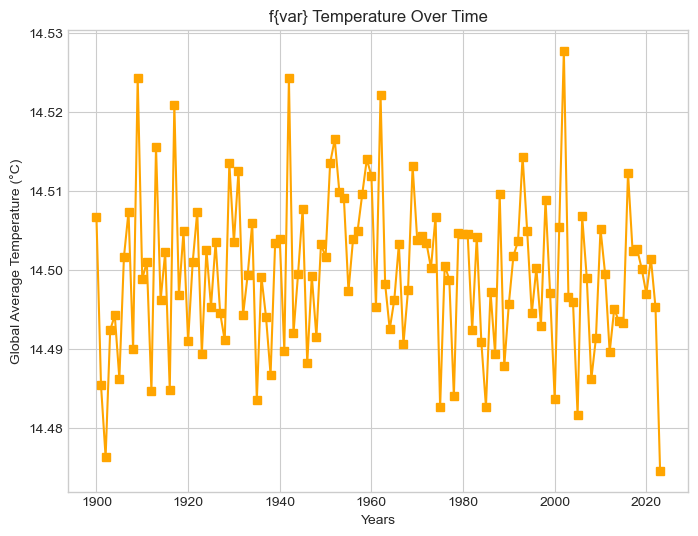

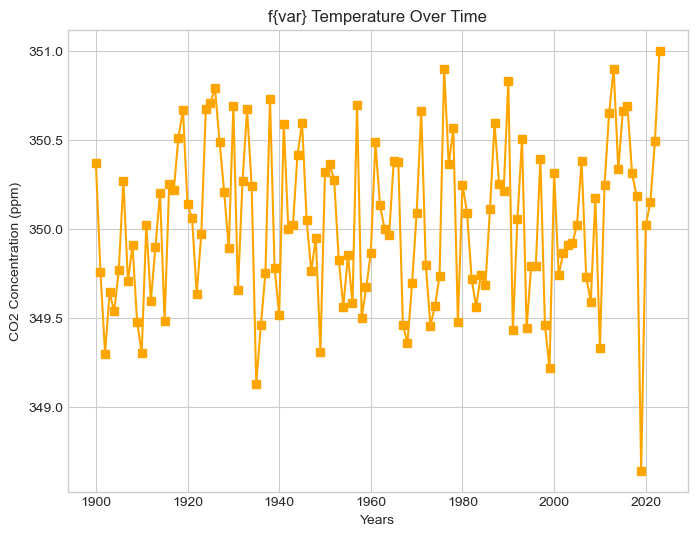

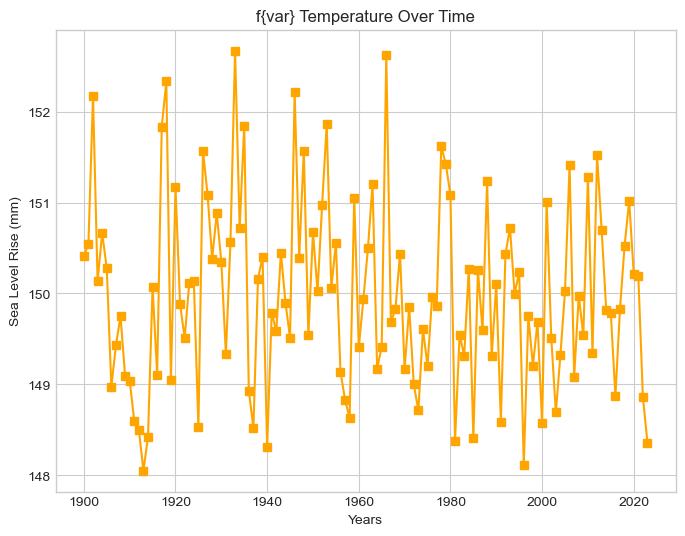

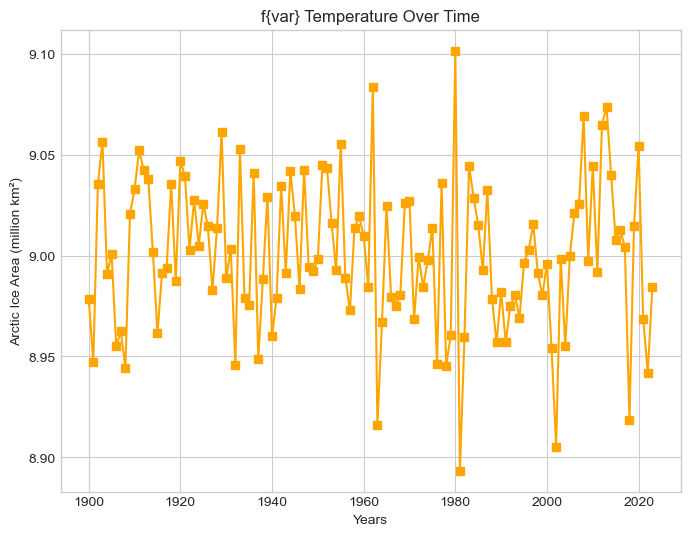

In [35]:
def bivariate_lineplotanalysis(some_datas):
 for var in df.columns:
  if var != 'Year':
   plt.figure(figsize=(8, 6))
   plt.plot(ag_data["Year"], some_datas[var], marker = "s", color="orange")
   
   plt.title("f{var} Temperature Over Time")
   plt.xlabel("Years")
   plt.ylabel(var)
   plt.grid(True)
   plt.show()
bivariate_lineplotanalysis(ag_data)  

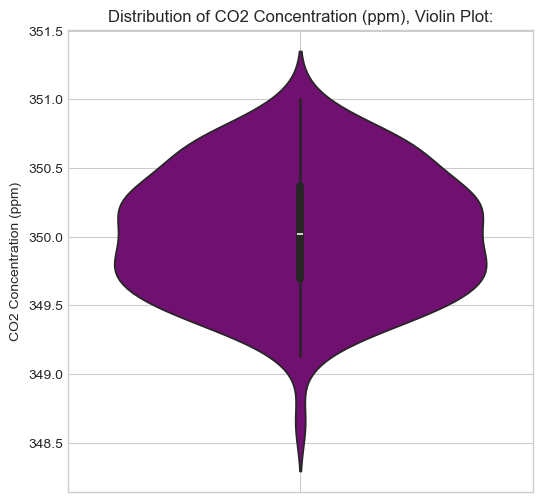

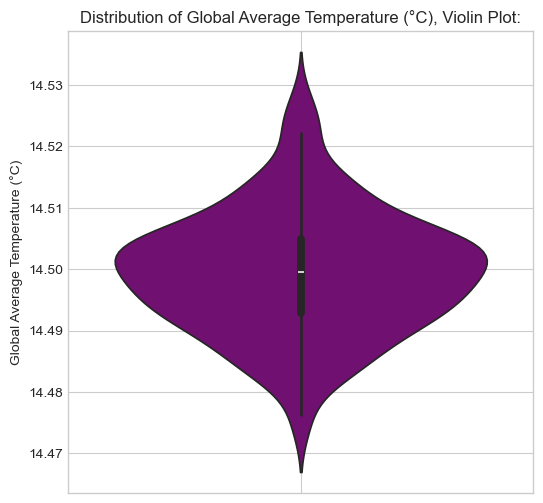

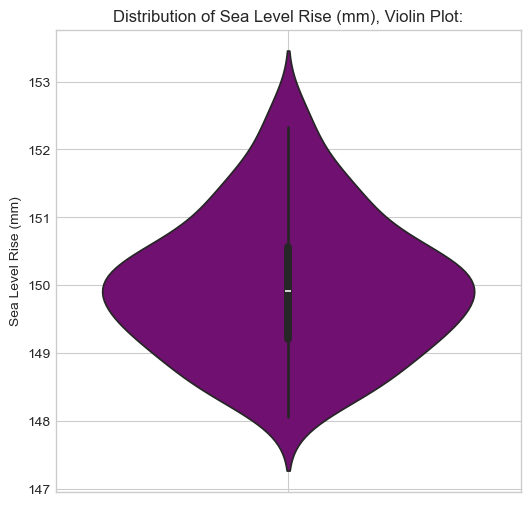

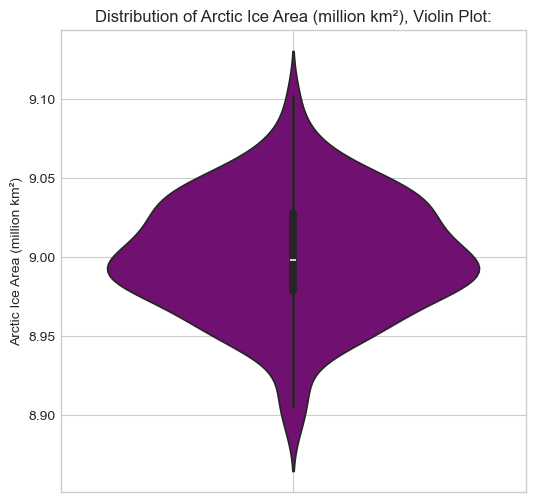

In [36]:
def bivariate_violonplot(ag_data):
    for var in variables:
        plt.figure(figsize=(6, 6))
        sns.violinplot(y=ag_data[var], color="purple")

        plt.title(f"Distribution of {var}, Violin Plot:")
        plt.ylabel(var)
        plt.grid(True)
        plt.show()
bivariate_violonplot(ag_data)

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

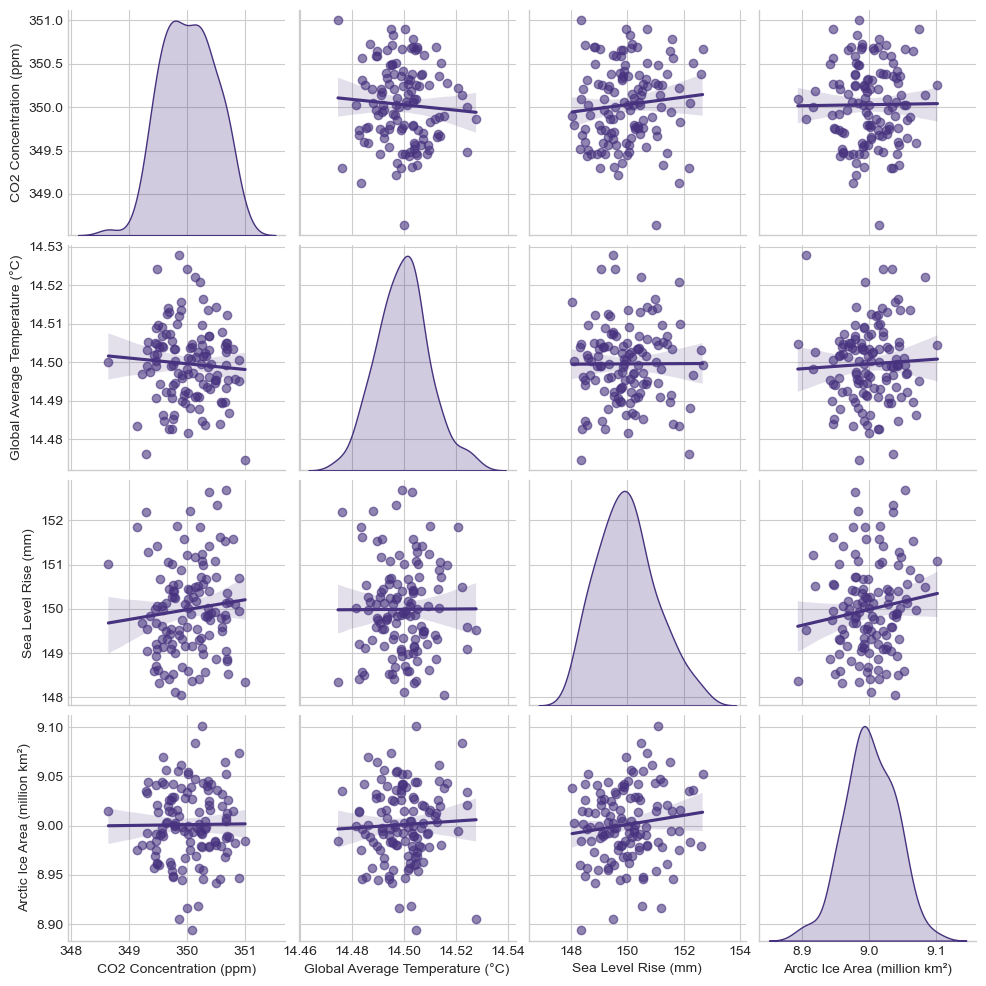

In [31]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
variables = ['CO2 Concentration (ppm)', 'Global Average Temperature (°C)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']
# Pairplot
sns.pairplot(ag_data, vars = variables, kind= "reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})

plt.show()

## Insight from pairplot (Kde and scatterplot)
<ol><li>Variable Distributions (Diagonal KDE plots):</li>

<ul><li>While CO₂ and temperature appear somewhat normal, checking for skewness or kurtosis could provide more insight into potential deviations from normality.</li>
<li>
Sea Level Rise and Arctic Ice Area might exhibit non-normal distributions due to long-term trends and seasonal variations.</li></ul>

<li>Scatter Plot Relationships:</li></ol>

<ul><li>CO₂ vs Temperature:</li> A weak or moderate correlation suggests that temperature is influenced by additional factors like ocean currents, aerosols, and solar radiation. A time-lag analysis might reveal a delayed effect of CO₂ on temperature.
<li>Sea Level Rise vs Arctic Ice Area:</li> The negative correlation aligns with climate models, but variations might be due to regional ice loss patterns and oceanic heat uptake.
<li>CO₂ vs Arctic Ice Area:</li></li> A lack of a strong correlation could mean ice melt is driven by localized warming, ocean temperatures, and feedback loops rather than direct CO₂ concentration increases.

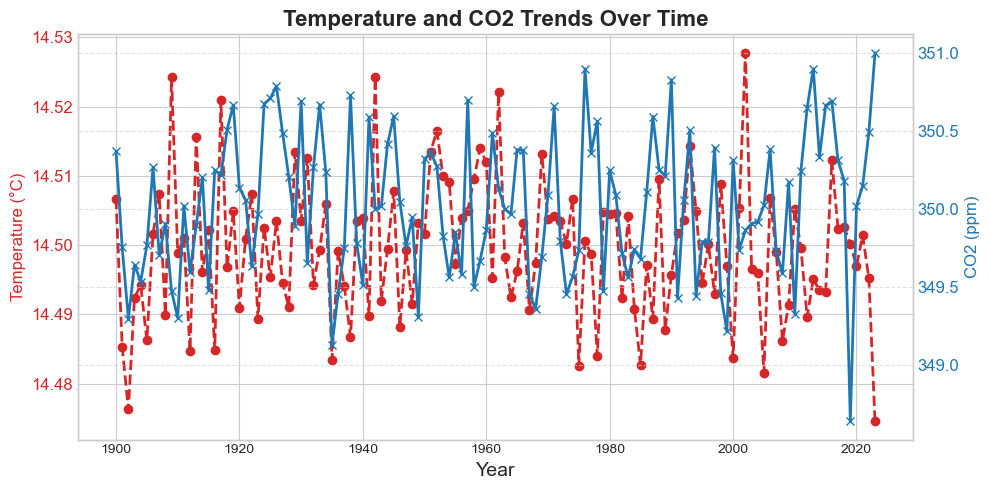

In [39]:
#Multivariate time series plot 
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:red', fontsize=12)
ax1.plot(ag_data['Year'], ag_data['Global Average Temperature (°C)'], color='tab:red', linewidth=2.0, linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppm)', color='tab:blue', fontsize=12)
ax2.plot(ag_data['Year'], ag_data['CO2 Concentration (ppm)'], color='tab:blue', linewidth=2.0, linestyle='-', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

plt.title('Temperature and CO2 Trends Over Time', fontsize=16, fontweight='bold')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Insights from the temperature and CO2 trends over time plot
<ul>
<li>The trends exhibit high-frequency fluctuations, suggesting seasonal or short-term variations.</li>
<li>While both variables fluctuate significantly, their patterns appear somewhat synchronized in certain periods.</li>
<li>However, the CO₂ trend does not show a strong long-term upward trajectory, which could be due to limited data range or specific scaling choices.</li>
<li>The temperature appear more fluctuating while the CO2 concentration appears slightly more stable, tending to change gradually over time.</li></ul>

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here

### Findings
<ol type = "a">
<li>Univariate Analysis</li>
• Over the time period of 124 years , the average global temperature is 14.5 C with standard deviation of 0.0099 which indicates low variability within dataset and most values are similar to mean value.
• The mean CO2 concentration is 350 ppm with standard deviation of 0.4565 indicates data are somewhat spreaded from mean value but not so excessively.Over last decades CO2 concentration seems to be gradually increasing.
• The average sea level rise is 149.99 mm with standard deviation of 1.03 (moderate). Time series plot indicates that over last 3 or 4 decades there is decrease in rise in sea level than previous decades.
• The average arctic ice area is 9 million sq. km with standard deviatin of 0.037 indicates decreasing trend of arctic ice over last few decades suggesting increase in sea level and global warming .
<li>Bivariate Analysis</li>
• The highest positive correlation is between arctice ice area reduction and sea level rise(0.13) which makes complete sense meaning with reduction in ice area there is rise in sea level.
• The correlation heatmap also shows potential link between co2 concentration rise and sea level rise.
<li>Multivariate Analysis</li>
• CO2 concentration, global average temperature and sea level rise are correlated. Increase in CO2 concentration results in increase in global average temperature which results in melting of ice and thus rise in sea level.

</ol>
### Final Conclusions
<ol>
<li>Global Temperature Increase</li>
The time-series analysis of various climate variables confirms the steady rise in temperature with annual fluctuations. The long-term trend of annual temperature is clearly upward since the first year 1900.
<li>CO2 Concentration</li>
Although, the regression plot depicts a weaker correlation, it may be due to short-term fluctuations or dataset constraints. 
<li>Sea Level Rise Trend</li> 
The analysis suggests a weak direct correlation between temperature and Arctic ice loss. 
<li>The data and insights of analysis cope with historical evidence and scientific studies about increasing global warming, melting of ice and rise in sea level.</li>
</ol>